<a href="https://colab.research.google.com/github/DS3001/group10/blob/main/project_2/Combined_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
! git clone https://github.com/DS3001/group10/

fatal: destination path 'group10' already exists and is not an empty directory.


In [316]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


With everyone in our group building a seperate model, we decided to try combining all the models. Two group members did KNeighbors and the rest did linear regression. First, we cleaned the data with a mixture of all the strategies our team members used. Then, we made a linear regression model without polynomial expansion and one with. For the KNeighbors, we build both a classification and a regression model. We chose the KNeighbors regression model one out of all of them because it had the lowest RMSE. This is the last model listed, but we included all of them to show our progress.

In [317]:
df_train = pd.read_csv("./group10/project_2/data/training_data.csv")
df_test = pd.read_csv("./group10/project_2/data/testing_data.csv")

In [318]:
display(df_train)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,110,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
4083,139,29281,Male,76.0,1,0,Yes,Self-employed,Rural,194.37,27.0,formerly smoked,1
4084,207,37060,Female,81.0,0,0,Yes,Private,Rural,80.13,23.4,never smoked,1
4085,218,29552,Female,55.0,1,1,Yes,Private,Urban,210.40,40.0,smokes,1


In [319]:
# Creating the test and train X and Y variables
y_train = df_train['stroke']
X_train = df_train.drop(columns = ['stroke'],axis=1)
y_test = df_test['stroke']
X_test = df_test.drop(columns = ['stroke'],axis=1)

In [320]:
# Data cleaning

# We filled in the BMI NaN values with the mean
X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())


# Mapped all the string values to numerical values
X_train['ever_married'] = X_train['ever_married'].replace({"No":0, "Yes":1})
X_test['ever_married'] = X_test['ever_married'].replace({"No":0, "Yes":1})

X_train['gender'] = X_train['gender'].replace({"Male":0, "Female":1, "Other":2})
X_test['gender'] = X_test['gender'].replace({"Male":0, "Female":1, "Other":2})

X_train['smoking_status'] = X_train['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2,
                                                          "Unknown":3})
X_test['smoking_status'] = X_test['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2,
                                                          "Unknown":3})

X_train['Residence_type'] = X_train['Residence_type'].replace({"Urban":0, "Rural":1})
X_test['Residence_type'] = X_test['Residence_type'].replace({"Urban":0, "Rural":1})

X_train['work_type'] = X_train['work_type'].replace({"Private":0, "Self-employed":1, "children":2,
                                                          "Govt_job":3, "Never_worked":4})
X_test['work_type'] = X_test['work_type'].replace({"Private":0, "Self-employed":1, "children":2,
                                                          "Govt_job":3, "Never_worked":4})

<ipython-input-321-cccccb527fa0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x < lower_whisker] = lower_whisker
<ipython-input-321-cccccb527fa0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x > upper_whisker] = upper_whisker


<Axes: >

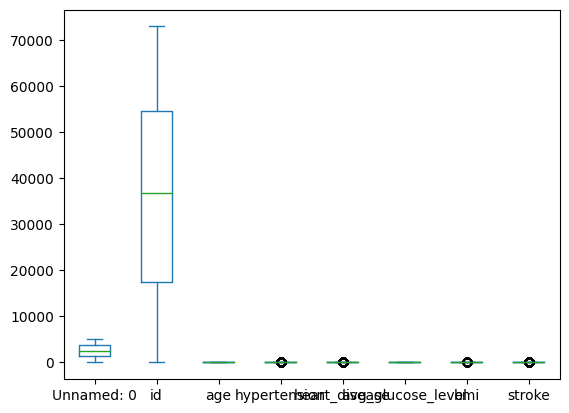

In [321]:
# one group member windsorized and it worked well so we implemented this for all the models
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

df_train['avg_glucose_level'] = windsorize(df_train['avg_glucose_level'])
df_train['bmi'] = windsorize(df_train['bmi'])

df_test['avg_glucose_level'] = windsorize(df_test['avg_glucose_level'])
df_test['bmi'] = windsorize(df_test['bmi'])


df_train.plot.box()

In [322]:
# another group member took the inverse hyperbolic sin of average glucose level
X_train['avg_glucose_level_ihs'] = np.arcsinh(X_train['avg_glucose_level'])
X_test['avg_glucose_level_ihs'] = np.arcsinh(X_test['avg_glucose_level'])

In [323]:
# basic linear model with no variable expansion only the changes made above
reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)

#calculating r-squared
rsqu = reg.score(X_test, y_test)
print("R-Squared: ", rsqu )
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )

R-Squared:  0.18969263636746614
RMSE:  0.1940844232564133


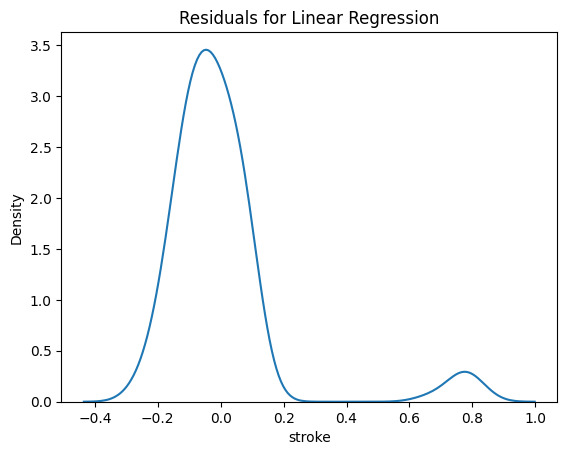

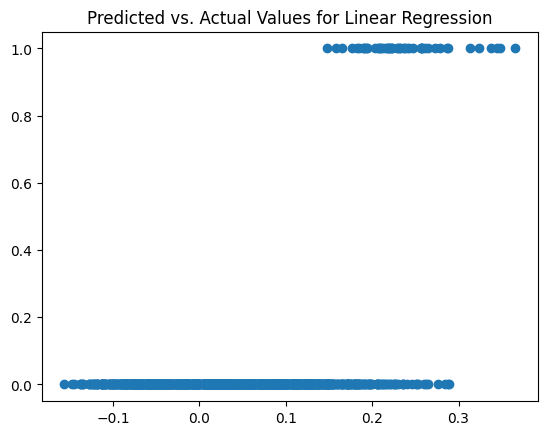

In [324]:
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.title("Residuals for Linear Regression")
plt.show()

plt.scatter(x=y_hat,y=y_test)
plt.title('Predicted vs. Actual Values for Linear Regression')
plt.show()

In [325]:
# Now this is a linear model with polynomial expansion
# We found that degree 2 gave the best results

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level_ihs'] ]

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

Z_train = pd.concat([continuous,dummies],axis=1)
Z_train.columns = Z_train.columns.astype(str)
X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level_ihs'] ]

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)

Z_test = pd.concat([continuous,dummies],axis=1)
Z_test.columns = Z_test.columns.astype(str)
# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)

print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )

R2:  0.08965600764404813
RMSE:  0.2057162286252861


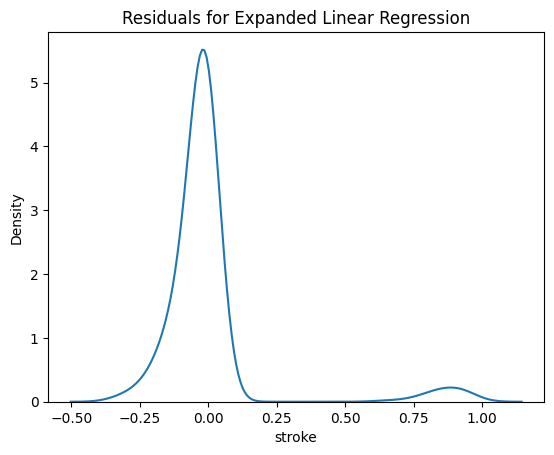

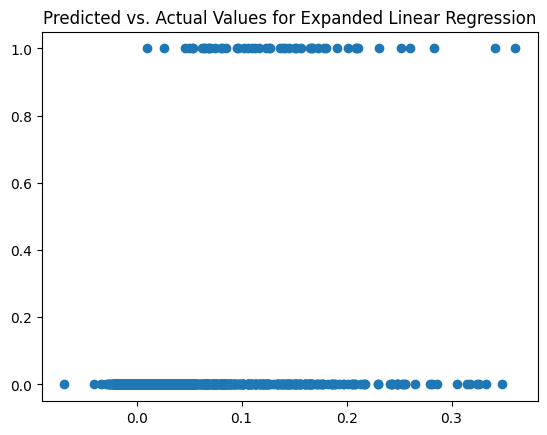

In [326]:
# computes the residuals and plots the curve
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.title("Residuals for Expanded Linear Regression")
plt.show()

# this plot shows the difference between predicted and actual values
plt.scatter(x=y_hat,y=y_test)
plt.title('Predicted vs. Actual Values for Expanded Linear Regression')
plt.show()

In [327]:
# This is the KNeighborsClassifer model with 9 neighbors
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)

In [328]:
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

# Calculate RMSE
y_hat = model.predict(X_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )


R-squared: 0.956989247311828
RMSE:  0.20739033894608505


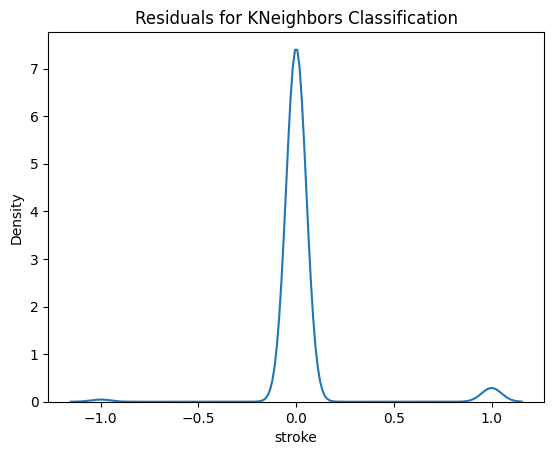

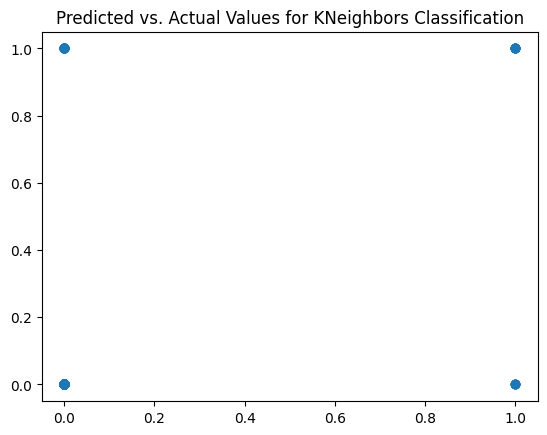

In [329]:
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.title("Residuals for KNeighbors Classification")
plt.show()

plt.scatter(x=y_hat,y=y_test)
plt.title('Predicted vs. Actual Values for KNeighbors Classification')
plt.show()

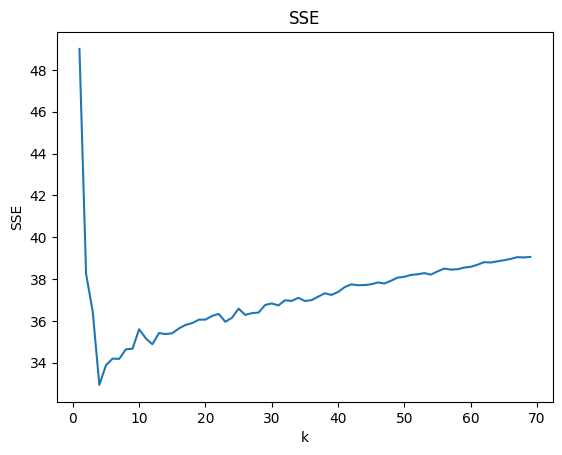

In [330]:
# Finally, the best model KNeighbors regressor.
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()
# The plot shows that the best values for k is 3!

## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

In [331]:
TSS = np.sum( (y_test - y_test.mean())**2 )
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N
RMSE_knn = (SSE_knn/N)**(1/2)
R2_knn = 1 - SSE_knn/TSS
print("R^2:", R2_knn)
print("RMSE:", RMSE_knn)

R^2: 0.3073985097636177
RMSE: 0.17943514064131835


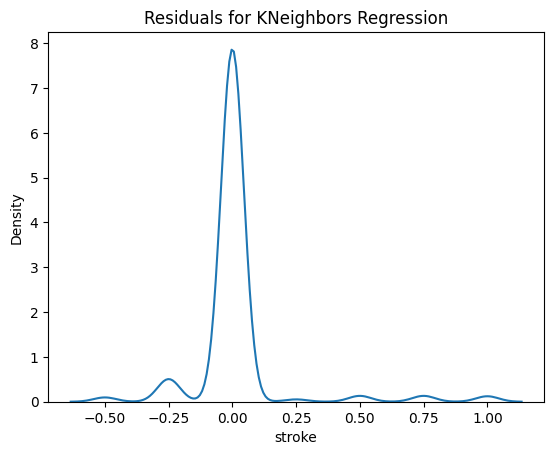

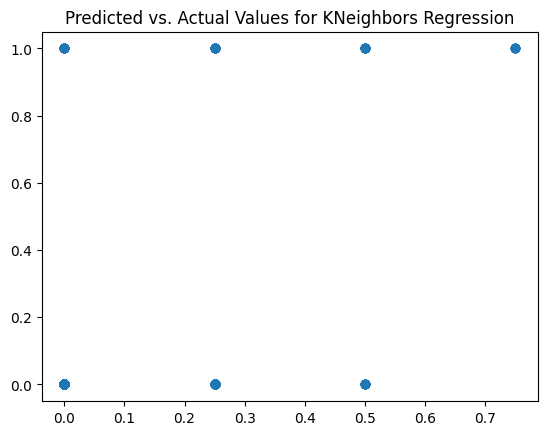

In [332]:
residuals_knn = y_test - y_hat_knn
sns.kdeplot(residuals_knn)
plt.title("Residuals for KNeighbors Regression")
plt.show()

plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values for KNeighbors Regression')
plt.show()